In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta

start =  (date.today() - relativedelta(years = 5)).strftime("%Y-%m-%d")
end = date.today().strftime("%Y-%m-%d")
df = data.DataReader('BAJAJ-AUTO.NS','yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-14,2910.000000,2854.050049,2902.000000,2866.699951,309456.0,2491.052490
2017-03-15,2890.000000,2856.050049,2869.699951,2873.100098,221254.0,2496.613770
2017-03-16,2944.899902,2862.500000,2881.300049,2936.399902,431866.0,2551.618896
2017-03-17,2948.699951,2890.149902,2945.899902,2912.500000,296053.0,2530.850830
2017-03-20,2932.500000,2905.149902,2916.149902,2923.550049,190575.0,2540.452637


In [2]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-07,3279.000000,3125.000000,3185.0,3234.649902,335205.0,3234.649902
2022-03-08,3354.449951,3175.699951,3229.0,3317.100098,557492.0,3317.100098
2022-03-09,3360.000000,3293.000000,3320.0,3339.000000,508262.0,3339.000000
2022-03-10,3440.000000,3385.399902,3399.0,3422.350098,350154.0,3422.350098
2022-03-11,3445.500000,3386.449951,3400.0,3420.250000,141246.0,3420.250000


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-03-14,2910.000000,2854.050049,2902.000000,2866.699951,309456.0,2491.052490
1,2017-03-15,2890.000000,2856.050049,2869.699951,2873.100098,221254.0,2496.613770
2,2017-03-16,2944.899902,2862.500000,2881.300049,2936.399902,431866.0,2551.618896
3,2017-03-17,2948.699951,2890.149902,2945.899902,2912.500000,296053.0,2530.850830
4,2017-03-20,2932.500000,2905.149902,2916.149902,2923.550049,190575.0,2540.452637


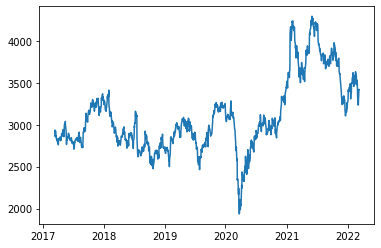

In [4]:
plt.plot(df.Date, df.Close)

In [5]:
df.shape

(1236, 7)

In [6]:
data_training = pd.DataFrame(df['Close'])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.39463869],
       [0.3973512 ],
       [0.42417883],
       ...,
       [0.59480826],
       [0.63013359],
       [0.62924353]])

In [9]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train.shape

(1136, 100, 1)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, LSTM, Dense
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 100,batch_size=64)

Epoch 1/100
18/18 [==============================] - 20s 247ms/step - loss: 0.0559
Epoch 2/100
18/18 [==============================] - 4s 229ms/step - loss: 0.0087
Epoch 3/100
18/18 [==============================] - 4s 217ms/step - loss: 0.0055
Epoch 4/100
18/18 [==============================] - 4s 216ms/step - loss: 0.0044
Epoch 5/100
18/18 [==============================] - 4s 223ms/step - loss: 0.0040
Epoch 6/100
18/18 [==============================] - 5s 257ms/step - loss: 0.0037
Epoch 7/100
18/18 [==============================] - 4s 220ms/step - loss: 0.0033
Epoch 8/100
18/18 [==============================] - 4s 245ms/step - loss: 0.0029
Epoch 9/100
18/18 [==============================] - 4s 209ms/step - loss: 0.0028
Epoch 10/100
18/18 [==============================] - 4s 200ms/step - loss: 0.0027
Epoch 11/100
18/18 [==============================] - 4s 219ms/step - loss: 0.0025
Epoch 12/100
18/18 [==============================] - 4s 243ms/step - loss: 0.0023
Epoch 13/100

18/18 [==============================] - 4s 197ms/step - loss: 5.3664e-04
Epoch 98/100
18/18 [==============================] - 3s 188ms/step - loss: 5.4538e-04
Epoch 99/100
18/18 [==============================] - 3s 190ms/step - loss: 5.6101e-04
Epoch 100/100
18/18 [==============================] - 3s 190ms/step - loss: 5.2979e-04


In [15]:
model.save('Bajaj_final_model.h5')